In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime

from FIESTA_functions import *
from HARPS_N_functions import *

#----------------------------------
# Read data
#----------------------------------
if 0:
    v_grid  = np.loadtxt('../lib/data_526_625/v_grid.txt')
    CCF     = np.loadtxt('../lib/data_526_625/CCF.txt')
    σ_CCF   = np.loadtxt('../lib/data_526_625/σ_CCF.txt')
    bjd     = np.loadtxt('../lib/data_526_625/bjd.txt')
    rv      = np.loadtxt('../lib/data_526_625/rv.txt')
    σrv     = np.loadtxt('../lib/data_526_625/σrv.txt')

if 1:
    v_grid  = np.loadtxt('../lib/data_v4/v_grid.txt')
    CCF     = np.loadtxt('../lib/data_v4/CCF.txt')
    σ_CCF   = np.loadtxt('../lib/data_v4/σCCF.txt')
    bjd     = np.loadtxt('../lib/data_v4/bjd.txt')
    rv      = np.loadtxt('../lib/data_v4/rv.txt')
    σrv     = np.loadtxt('../lib/data_v4/σrv.txt')


In [2]:
σ_CCF.shape, CCF.shape, v_grid.shape

((95, 31795), (95, 31795), (95,))

In [3]:
v_grid

array([ 87.25,  87.5 ,  87.75,  88.  ,  88.25,  88.5 ,  88.75,  89.  ,
        89.25,  89.5 ,  89.75,  90.  ,  90.25,  90.5 ,  90.75,  91.  ,
        91.25,  91.5 ,  91.75,  92.  ,  92.25,  92.5 ,  92.75,  93.  ,
        93.25,  93.5 ,  93.75,  94.  ,  94.25,  94.5 ,  94.75,  95.  ,
        95.25,  95.5 ,  95.75,  96.  ,  96.25,  96.5 ,  96.75,  97.  ,
        97.25,  97.5 ,  97.75,  98.  ,  98.25,  98.5 ,  98.75,  99.  ,
        99.25,  99.5 ,  99.75, 100.  , 100.25, 100.5 , 100.75, 101.  ,
       101.25, 101.5 , 101.75, 102.  , 102.25, 102.5 , 102.75, 103.  ,
       103.25, 103.5 , 103.75, 104.  , 104.25, 104.5 , 104.75, 105.  ,
       105.25, 105.5 , 105.75, 106.  , 106.25, 106.5 , 106.75, 107.  ,
       107.25, 107.5 , 107.75, 108.  , 108.25, 108.5 , 108.75, 109.  ,
       109.25, 109.5 , 109.75, 110.  , 110.25, 110.5 , 110.75])

In [4]:
idx_v       = (v_grid>87) & (v_grid<111)
v_grid      = v_grid[idx_v]
CCF         = CCF[idx_v,:]

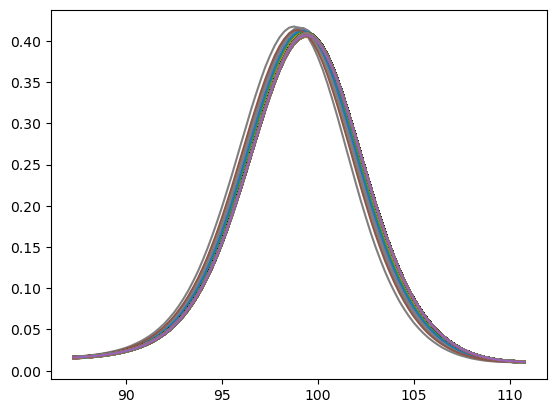

In [5]:
plt.plot(v_grid, CCF)
plt.show()

In [36]:
#----------------------------------
# Plot the RVs 
#----------------------------------

def plot_rv(date1, date2):
    plt.rcParams.update({'font.size': 14})
    alpha   = 0.3
    colors  = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                  '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                  '#bcbd22', '#17becf']

    idx_bjd = (bjd>date1) & (bjd<date2+1)

    fig, axes = plt.subplots(figsize=(15, 3))
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.errorbar(bjd[idx_bjd]-2400000, rv[idx_bjd]-np.mean(rv[idx_bjd]), σrv[idx_bjd], c='red', marker='.', ls='none', alpha=alpha, label='rv')
    plt.errorbar(bjd[idx_bjd]-2400000, RV_gauss[idx_bjd]-np.mean(RV_gauss[idx_bjd]), σrv[idx_bjd], c='blue', marker='.', ls='none', alpha=alpha, label='RV_gauss')
    plt.legend()
    plt.xlabel('BJD - 2400000 [d]')
    plt.ylabel('RV [m/s]')

    if date1 == date2:
        filename = '%d.%d.%d' %(tuple(pyasl.daycnv(date1))[:3])
        plt.title('%d.%d.%d' %tuple(pyasl.daycnv(date1))[:3])
    else:
        filename = '%d.%d.%d-%d.%d.%d' %(tuple(pyasl.daycnv(date1))[:3]+tuple(pyasl.daycnv(date2))[:3])
        plt.title(filename)
    plt.savefig('./figure/' + filename+'.png')
    plt.show()


### activity indicators 

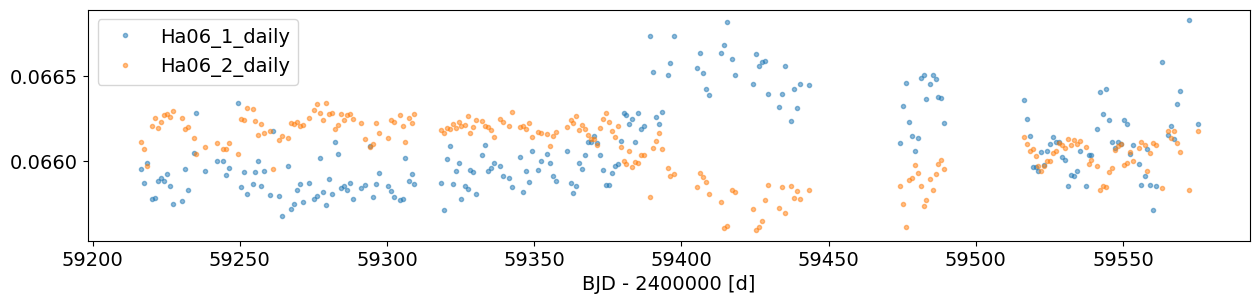

In [6]:
import pandas as pd
from sklearn.preprocessing import normalize
df  = pd.read_csv('../lib/combined_rvs_1.csv')
df_daily = pd.read_csv('../lib/summary_1.csv')
bjd_daily = df_daily['obs_date.mean_bjd']
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(figsize=(15, 3))
alpha=0.5
# plt.plot(bjd-2400000, normalize([np.array(df['CaIIHK'])])[0,:], '.', label='CaIIHK',alpha=alpha)
# plt.plot(bjd-2400000, normalize([np.array(df['Ha06_1'])])[0,:], '.', label='Ha06_1',alpha=alpha)
plt.plot(bjd_daily-2400000, normalize([np.array(df_daily['indicators.Ha06_1'])])[0,:], '.', label='Ha06_1_daily',alpha=alpha)
plt.plot(bjd_daily-2400000, normalize([np.array(df_daily['indicators.Ha16_1'])])[0,:], '.', label='Ha06_2_daily',alpha=alpha)
# plt.plot(bjd-2400000, normalize([np.array(df['Ha06_2'])])[0,:], '.', label='Ha06_2',alpha=alpha)
# plt.plot(bjd-2400000, normalize([np.array(df['Ha16_1'])])[0,:], '.', label='Ha16_1',alpha=alpha)
# plt.plot(bjd-2400000, normalize([np.array(df['Ha16_2'])])[0,:], '.', label='Ha16_2',alpha=alpha)
# plt.plot(bjd-2400000, normalize([np.array(df['CaI_1'])])[0,:], '.', label='CaI_1',alpha=alpha)
# plt.plot(bjd-2400000, normalize([np.array(df['CaI_2'])])[0,:], '.', label='CaI_2',alpha=alpha)
# plt.plot(bjd-2400000, normalize([np.array(df['HeI_1'])])[0,:], '.', label='HeI_1',alpha=alpha)
# plt.plot(bjd-2400000, normalize([np.array(df['HeI_2'])])[0,:], '.', label='HeI_2',alpha=alpha)
# plt.plot(bjd-2400000, normalize([np.array(df['NaI'])])[0,:], '.', label='NaI',alpha=alpha)
# plt.plot(bjd-2400000, normalize([np.array(df['NaINIR'])])[0,:], '.', label='NaINIR',alpha=alpha)

plt.xlabel('BJD - 2400000 [d]')
plt.legend()
plt.show()


### RVs

In [8]:
import pandas as pd
quality_df  = pd.read_csv('../lib/combined_rvs_1.csv')

rv_by_order = quality_df.iloc[:,75::2].values
σrv_by_order = quality_df.iloc[:,76::2].values
rv_drp = quality_df['rv_drp']*1000
rv_template = quality_df['rv_template']

def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights, axis=1)
    # Fast and numerically precise:
    variance = np.average(((np.subtract(values.T,average))**2).T, weights=weights, axis=1)
    return (average, np.sqrt(variance))

ave, rms_by_obs = weighted_avg_and_std(values=rv_by_order, weights=1/σrv_by_order**2)



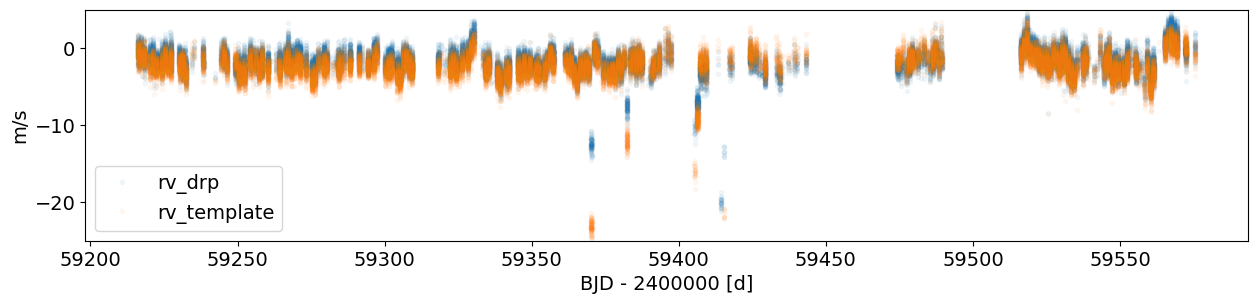

In [9]:
fig, axes = plt.subplots(figsize=(15, 3))
alpha=0.05
# plt.plot(bjd-2400000, rms_by_obs, '.', label='RV_order_std', alpha=alpha)
# plt.plot(bjd-2400000, ave-20, '.', label='weighted RV', alpha=alpha)
# plt.plot(bjd-2400000, rv_drp+580, '.', label='rv_drp', alpha=alpha)
# plt.plot(bjd-2400000, rv_template-40, '.', label='rv_template', alpha=alpha)

plt.plot(bjd-2400000, rv_drp-rv_drp[0], '.', label='rv_drp', alpha=alpha)
plt.plot(bjd-2400000, rv_template-rv_template[0], '.', label='rv_template', alpha=alpha)
# plt.plot(bjd-2400000, RV_gauss-RV_gauss[0], '.', label='RV_gauss', alpha=alpha)

plt.legend()
plt.xlabel('BJD - 2400000 [d]')
plt.ylabel('m/s')
plt.ylim(-25,5)
plt.show()

### exclude bad observations (days)

#### reject rvs lie outside 1-sigma rv

In [10]:
def weighted_avg_and_std2(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

_, rv_drp_std = weighted_avg_and_std2(rv_drp, σrv)

In [11]:
rv_drp_median = np.median(rv_drp)
idx_rej_1sigma = abs(rv_drp-np.median(rv_drp)) > (1*rv_drp_std)
sum(idx_rej_1sigma)

144

#### reject rvs on user-defined dates

In [13]:
dates_to_exclude = [datetime(2021, 6, 4), datetime(2021, 6, 16), datetime(2021, 7, 9), datetime(2021, 7, 10), datetime(2021, 7, 18), datetime(2021, 7, 19)]

idx_rej_bjd = np.zeros(bjd.shape, dtype=bool)

# use pyasl.jdcnv(date)+1 to translate to the corresponding bjd
for date in dates_to_exclude:
    idx = (abs(bjd-pyasl.jdcnv(date)-1)<0.5)
    idx_rej_bjd = idx_rej_bjd | idx
    print(sum(idx))
    
sum(idx_rej_bjd)

82
89
22
191
25
9


418

#### reject days with few observations (<10)

In [14]:
idx_rej_fewobs = np.zeros(bjd.shape, dtype=bool)
obs_date = df_daily['obs_date.string']

for i in range(len(obs_date)):
    if df_daily['num_rvs.good'][i] < 10:
        date = datetime(int(obs_date[i][0:4]), int(obs_date[i][5:7]), int(obs_date[i][8:10]))
        idx = (abs(bjd-pyasl.jdcnv(date)-1)<0.5)
        idx_rej_fewobs = idx_rej_fewobs | idx
#         print(sum(idx))
sum(idx_rej_fewobs)

225

#### only use 59260< bjd-2400000 < 59500

In [15]:
idx_rej_bjd2 = ((bjd-2400000)> 59500) | ((bjd-2400000)<59260)
sum(idx_rej_bjd2)

13206

#### all rejects

In [16]:
idx_rej = idx_rej_1sigma | idx_rej_bjd | idx_rej_fewobs #| idx_rej_bjd2
sum(idx_rej)

650

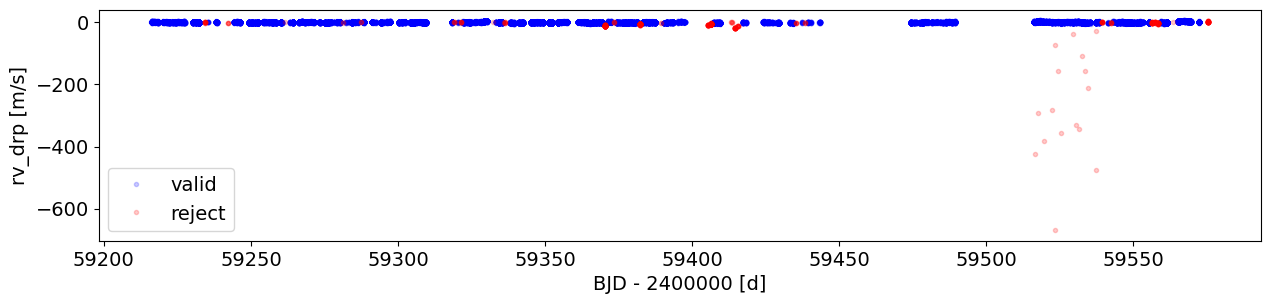

In [17]:
fig, axes = plt.subplots(figsize=(15, 3))
alpha=0.2
plt.plot(bjd[~idx_rej]-2400000, rv_drp[~idx_rej]-rv_drp_median, 'b.', label='valid', alpha=alpha)
plt.plot(bjd[idx_rej]-2400000, rv_drp[idx_rej]-rv_drp_median, 'r.', label='reject', alpha=alpha)
plt.legend()
plt.xlabel('BJD - 2400000 [d]')
plt.ylabel('rv_drp [m/s]')
plt.show()

zoom in y-axis

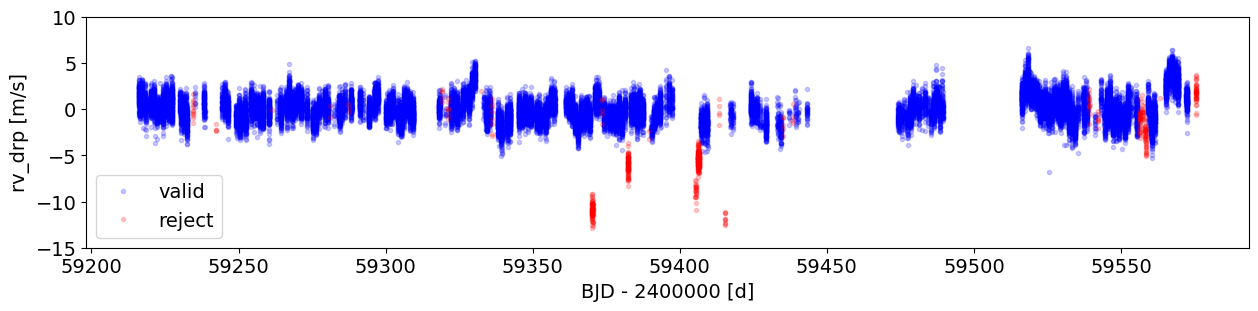

In [18]:
fig, axes = plt.subplots(figsize=(15, 3))
alpha=0.2
plt.plot(bjd[~idx_rej]-2400000, rv_drp[~idx_rej]-rv_drp_median, 'b.', label='valid', alpha=alpha)
plt.plot(bjd[idx_rej]-2400000, rv_drp[idx_rej]-rv_drp_median, 'r.', label='reject', alpha=alpha)
plt.legend()
plt.xlabel('BJD - 2400000 [d]')
plt.ylabel('rv_drp [m/s]')
plt.ylim(-15,10)
plt.show()

zoom in x-axis

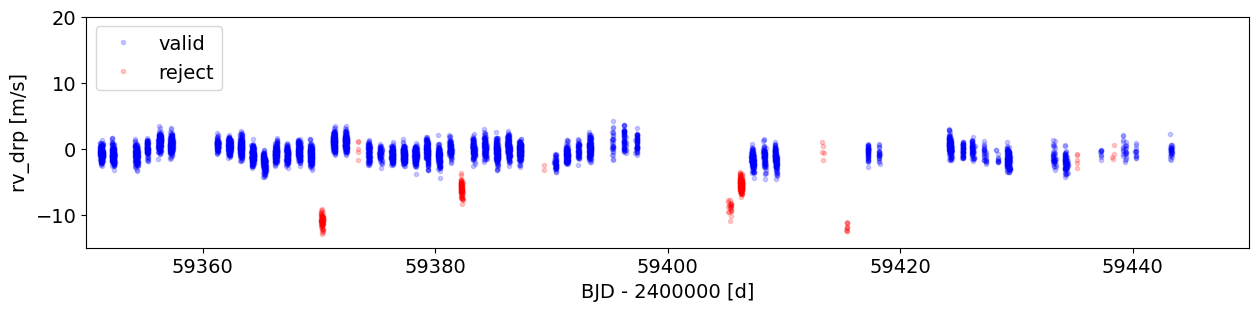

In [19]:
fig, axes = plt.subplots(figsize=(15, 3))
alpha=0.2
plt.plot(bjd[~idx_rej]-2400000, rv_drp[~idx_rej]-rv_drp_median, 'b.', label='valid', alpha=alpha)
plt.plot(bjd[idx_rej]-2400000, rv_drp[idx_rej]-rv_drp_median, 'r.', label='reject', alpha=alpha)
# plt.plot(bjd-2400000, (df['CaIIHK']-np.mean(df['CaIIHK']))*5000+10, 'k.', label='CaIIHK', alpha=alpha)
plt.legend(loc=2)
plt.xlabel('BJD - 2400000 [d]')
plt.ylabel('rv_drp [m/s]')
plt.xlim(59350,59450)
plt.ylim(-15,20)
plt.show()

In [23]:
np.savetxt('../lib/idx_rej.txt', idx_rej)

In [22]:
pwd

'/storage/work/jvz5625/NEID_solar/JupyterNotebook neid_fiesta'

## daily binned analysis 

In [20]:
bjd.shape, CCF.shape

((31795,), (95, 31795))

In [63]:
CCF_daily = np.zeros((CCF.shape[0], len(df_daily)))
σCCF_daily = np.zeros((CCF.shape[0], len(df_daily)))                     
bjd_daily = np.zeros(len(df_daily))
rv_daily = np.zeros(len(df_daily))
σrv_daily = np.zeros(len(df_daily))
                      
for i in range(len(df_daily)):    
    date = datetime(int(obs_date[i][0:4]), int(obs_date[i][5:7]), int(obs_date[i][8:10]))
    idx = (abs(bjd-pyasl.jdcnv(date)-1)<0.5)
    idx_daily = idx & (~idx_rej)
    if sum(idx_daily)!=0:
        flux = ((1-CCF[:,idx_daily])/σ_CCF[:,idx_daily])**2
        CCF_daily[:,i] = np.sum(flux, axis=1)
        σCCF_daily[:,i] = CCF_daily[:,i]**0.5 / np.percentile(CCF_daily[:,i], 95)
        CCF_daily[:,i] = CCF_daily[:,i] / np.percentile(CCF_daily[:,i], 95)
        bjd_daily[i], _ = weighted_avg_and_std2(bjd[idx_daily], 1/σrv[idx_daily]**2)              
        rv_daily[i], _ = weighted_avg_and_std2(rv[idx_daily], 1/σrv[idx_daily]**2)    
        σrv_daily[i] = (1/sum(1/σrv[idx_daily]**2))**0.5

idx_non0 = (bjd_daily!=0)
bjd_daily = bjd_daily[idx_non0]
CCF_daily = 1-CCF_daily[:,idx_non0]
σCCF_daily = σCCF_daily[:,idx_non0]
rv_daily = rv_daily[idx_non0]
σrv_daily = σrv_daily[idx_non0]

In [64]:
CCF_daily.shape

(95, 202)

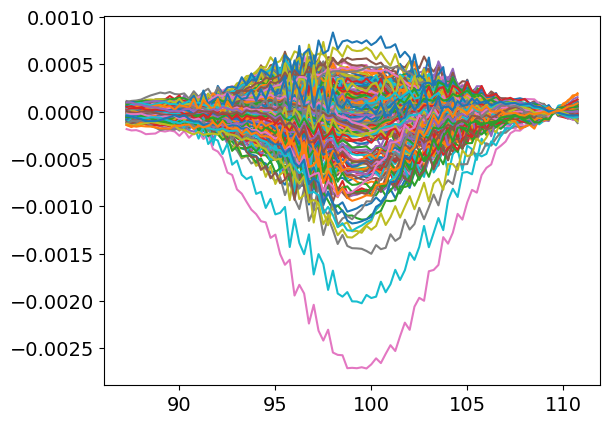

In [65]:
for i in range(CCF_daily.shape[1]):
    plt.plot(v_grid, CCF_daily[:,i] - np.median(CCF_daily, axis = 1))
plt.show()

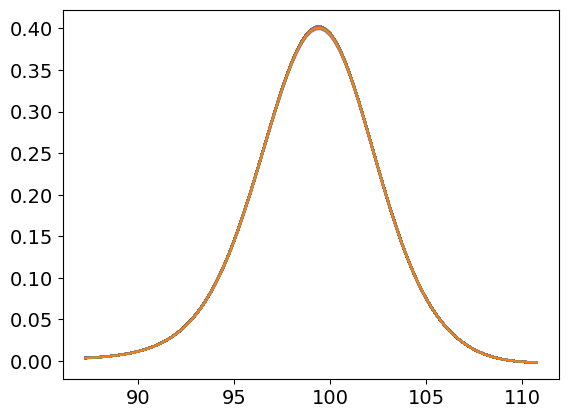

In [66]:
plt.plot(v_grid, CCF_daily)
plt.show()

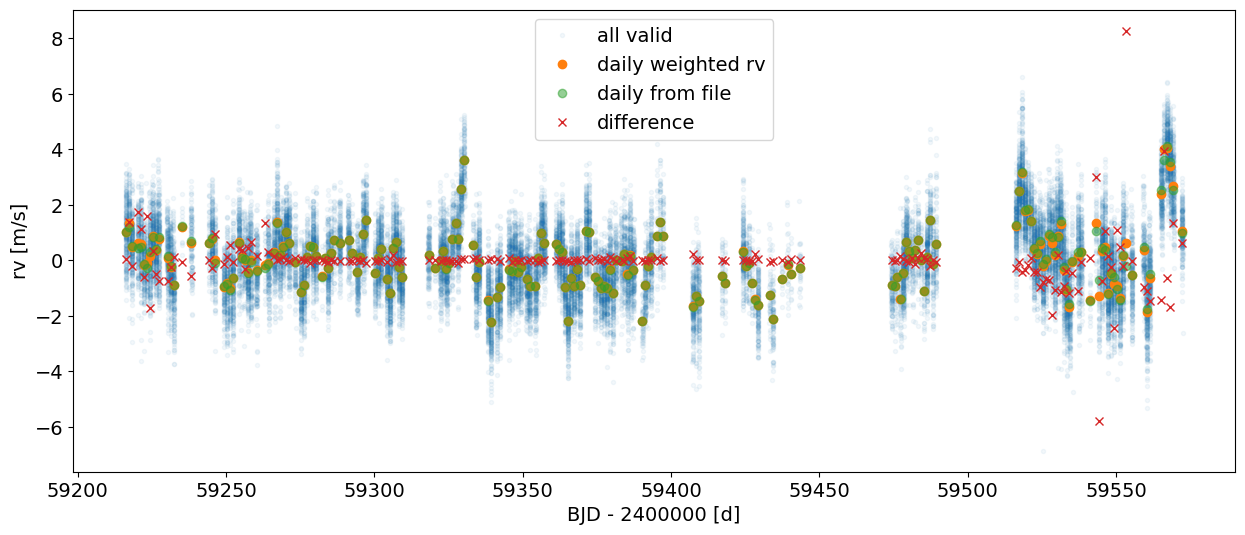

In [67]:
fig, axes = plt.subplots(figsize=(15, 6))
plt.plot(bjd[~idx_rej]-2400000, rv_drp[~idx_rej]-rv_drp_median, '.', label='all valid', alpha=0.05)
plt.plot(bjd_daily-2400000, rv_daily-rv_drp_median, 'o', label='daily weighted rv', alpha=1)
plt.plot(df_daily['obs_date.mean_bjd'][idx_non0]-2400000, df_daily['rv.drp.mean_rv'][idx_non0]-rv_drp_median, 'o', label='daily from file', alpha=0.5)
plt.plot(bjd_daily-2400000, (rv_daily - df_daily['rv.drp.mean_rv'][idx_non0])*10, 'x', label='difference')
plt.legend()
plt.xlabel('BJD - 2400000 [d]')
plt.ylabel('rv [m/s]')
# plt.ylim([59500,59600])
# plt.ylim([-6,6])
plt.show()

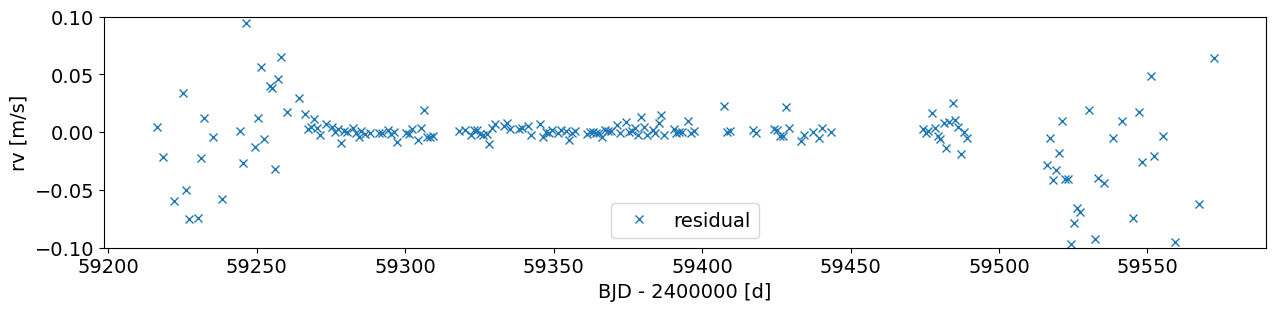

In [68]:
fig, axes = plt.subplots(figsize=(15, 3))
plt.plot(bjd_daily-2400000, (rv_daily - df_daily['rv.drp.mean_rv'][idx_non0]), 'x', label='residual')
plt.legend()
plt.xlabel('BJD - 2400000 [d]')
plt.ylabel('rv [m/s]')
plt.ylim(-0.1,0.1)
plt.show()

## FIESTA on daily CCF analysis

In [69]:
df, shift_spectrum_daily, err_shift_spectrum_daily, power_spectrum_daily, err_power_spectrum_daily, RV_gauss_daily = FIESTA(v_grid, CCF_daily, σCCF_daily, k_max=55)
shift_spectrum_daily      *= 1000
err_shift_spectrum_daily  *= 1000
RV_gauss_daily            *= 1000
shift_function_daily      = np.zeros(shift_spectrum_daily.shape)

for i in range(shift_spectrum_daily.shape[0]):
    shift_function_daily[i,:] = shift_spectrum_daily[i,:] - RV_gauss_daily 


Velocity grid used [87.25, 110.75]

ξ_normal = 1.98


The median SNR of all CCFs is 74808
ξ_modelling_noise = 1.98


Based on the user-defined SNR = 2.0:
ξ_individual = 1.98
ξ_timeseries = 1.73

In summary, the cut-off frequency for FIESTA is recommended to be 1.73 (41 frequency modes)

        ξ  individual_SNR  ts_SNR_A  ts_SNR_ϕ  modelling noise  \
0   0.000        163147.4     234.2       0.0          0.13837   
1   0.042        113823.0     137.4      34.6          0.04932   
2   0.084         42109.1      51.2      20.5          0.01201   
3   0.126         10340.3      25.3      11.7          0.00247   
4   0.168          2118.6      11.4       7.9          0.00055   
5   0.211           156.5       6.6      67.8          0.00052   
6   0.253           216.9       5.0       4.3          0.00046   
7   0.295           148.4       4.2       3.8          0.00043   
8   0.337           134.9       4.3       3.4          0.00040   
9   0.379           116.7       3.5       2.9      

## Plots 

In [70]:

def plot_all(k_mode, t, rv, erv, ind, eind, ts_xlabel, rv_xlabel, pe_xlabel, ind_yalbel, file_name):

	'''
	e.g. 
		k_mode 		= 11
		t 			= bjd_daily
		rv 			= rv_daily
		erv 		= erv_daily
		ind 		= shift_function
		eind 	 	= err_shift_spectrum
		ts_xlabel 	= 'BJD - 2400000 [d]'
		rv_xlabel 	= '$RV_{HARPS}$'
		pe_xlabel 	= 'Period [days]'
		ind_yalbel	= 'A'
		file_name 	= 'time-series_and_shift_correlation.png'

	'''

	def new_periodogram(x, y, dy, height_ratio=0.4, plot_min_t=1.5, max_f=1, spp=100):
	
		from scipy.signal import find_peaks
		from astropy.timeseries import LombScargle

		time_span = (max(x) - min(x))
		min_f   = 1/time_span

		frequency, power = LombScargle(x, y, dy).autopower(minimum_frequency=min_f,
													   maximum_frequency=max_f,
													   samples_per_peak=spp)

		plot_x = 1/frequency
		idxx = (plot_x>plot_min_t) & (plot_x<time_span/2)
		height = max(power[idxx])*height_ratio
		ax.plot(plot_x[idxx], power[idxx], 'k-', alpha=0.5)
		peaks, _ = find_peaks(power[idxx], height=height)
		ax.plot(plot_x[idxx][peaks], power[idxx][peaks], "ro")

		for n in range(len(plot_x[idxx][peaks])):
			ax.text(plot_x[idxx][peaks][n], power[idxx][peaks][n], '%.1f' % plot_x[idxx][peaks][n], fontsize=10)

		ax.set_xlim([plot_min_t,time_span/2])
		ax.set_ylim([0, 1.2*max(power[idxx])])

		ax.set_xscale('log')


	from sklearn.linear_model import LinearRegression

	# set up the plotting configureations
	alpha1, alpha2 = [0.5,0.2]
	widths 	= [7,1,7]
	heights = [1]*(k_mode+1)
	gs_kw 	= dict(width_ratios=widths, height_ratios=heights)
	plt.rcParams.update({'font.size': 12})
	fig6, f6_axes = plt.subplots(figsize=(16, k_mode+1), ncols=3, nrows=k_mode+1, constrained_layout=True,
	                             gridspec_kw=gs_kw)

	# plots 
	for r, row in enumerate(f6_axes):
		for c, ax in enumerate(row):	

			# time-series 
			if c==0:
				if r==0:
					ax.errorbar(t, rv-np.mean(rv), erv, marker='.', ms=5, color='black', ls='none', alpha=alpha1)
					ax.set_title('Time-series')
					ax.set_ylabel(rv_xlabel)
				else:				
					ax.errorbar(t, ind[r-1,:], eind[r-1,:],  marker='.', ms=5, color='black', ls='none', alpha=alpha1)
					ax.set_ylabel(ind_yalbel + '$_{' + str(r) + '}$')
				if r!=k_mode:
					ax.set_xticks([])
				else:
					ax.set_xlabel(ts_xlabel)

			if c==1:
				if r==0:
					reg = LinearRegression().fit(rv.reshape(-1, 1), rv.reshape(-1, 1))
					score = reg.score(rv.reshape(-1, 1), rv.reshape(-1, 1))
					adjust_R2 = 1-(1-score)*(len(t)-1)/(len(t)-1-1)
					title = r'$\bar{R}$' + r'$^2$'
					ax.set_title(title + ' = {:.2f}'.format(adjust_R2))					
					ax.plot(rv-np.mean(rv), rv-np.mean(rv), 'k.', alpha = alpha2)				
				if r>0:
					reg = LinearRegression().fit(rv.reshape(-1, 1), ind[r-1,:].reshape(-1, 1))
					score = reg.score(rv.reshape(-1, 1), ind[r-1,:].reshape(-1, 1))
					adjust_R2 = 1-(1-score)*(len(t)-1)/(len(t)-1-1)
					title = r'$\bar{R}$' + r'$^2$'
					ax.set_title(title + ' = {:.2f}'.format(adjust_R2))
					ax.plot(rv-np.mean(rv), ind[r-1,:], 'k.', alpha = alpha2)
				if r!=k_mode:
					ax.set_xticks([])
				else:
					ax.set_xlabel(rv_xlabel)
				ax.yaxis.tick_right()

			if c==2:
				if r==0:
					new_periodogram(t, rv, erv)
					ax.set_title('Periodogram')
				if r>0:
					new_periodogram(t, ind[r-1,:], eind[r-1,:])
				if r!=k_mode:
					ax.set_xticks([])
				if r==k_mode:
					ax.set_xlabel(pe_xlabel)
	if file_name !=[]:
		plt.savefig(file_name)

In [90]:
power_spectrum_daily.shape

(47, 202)

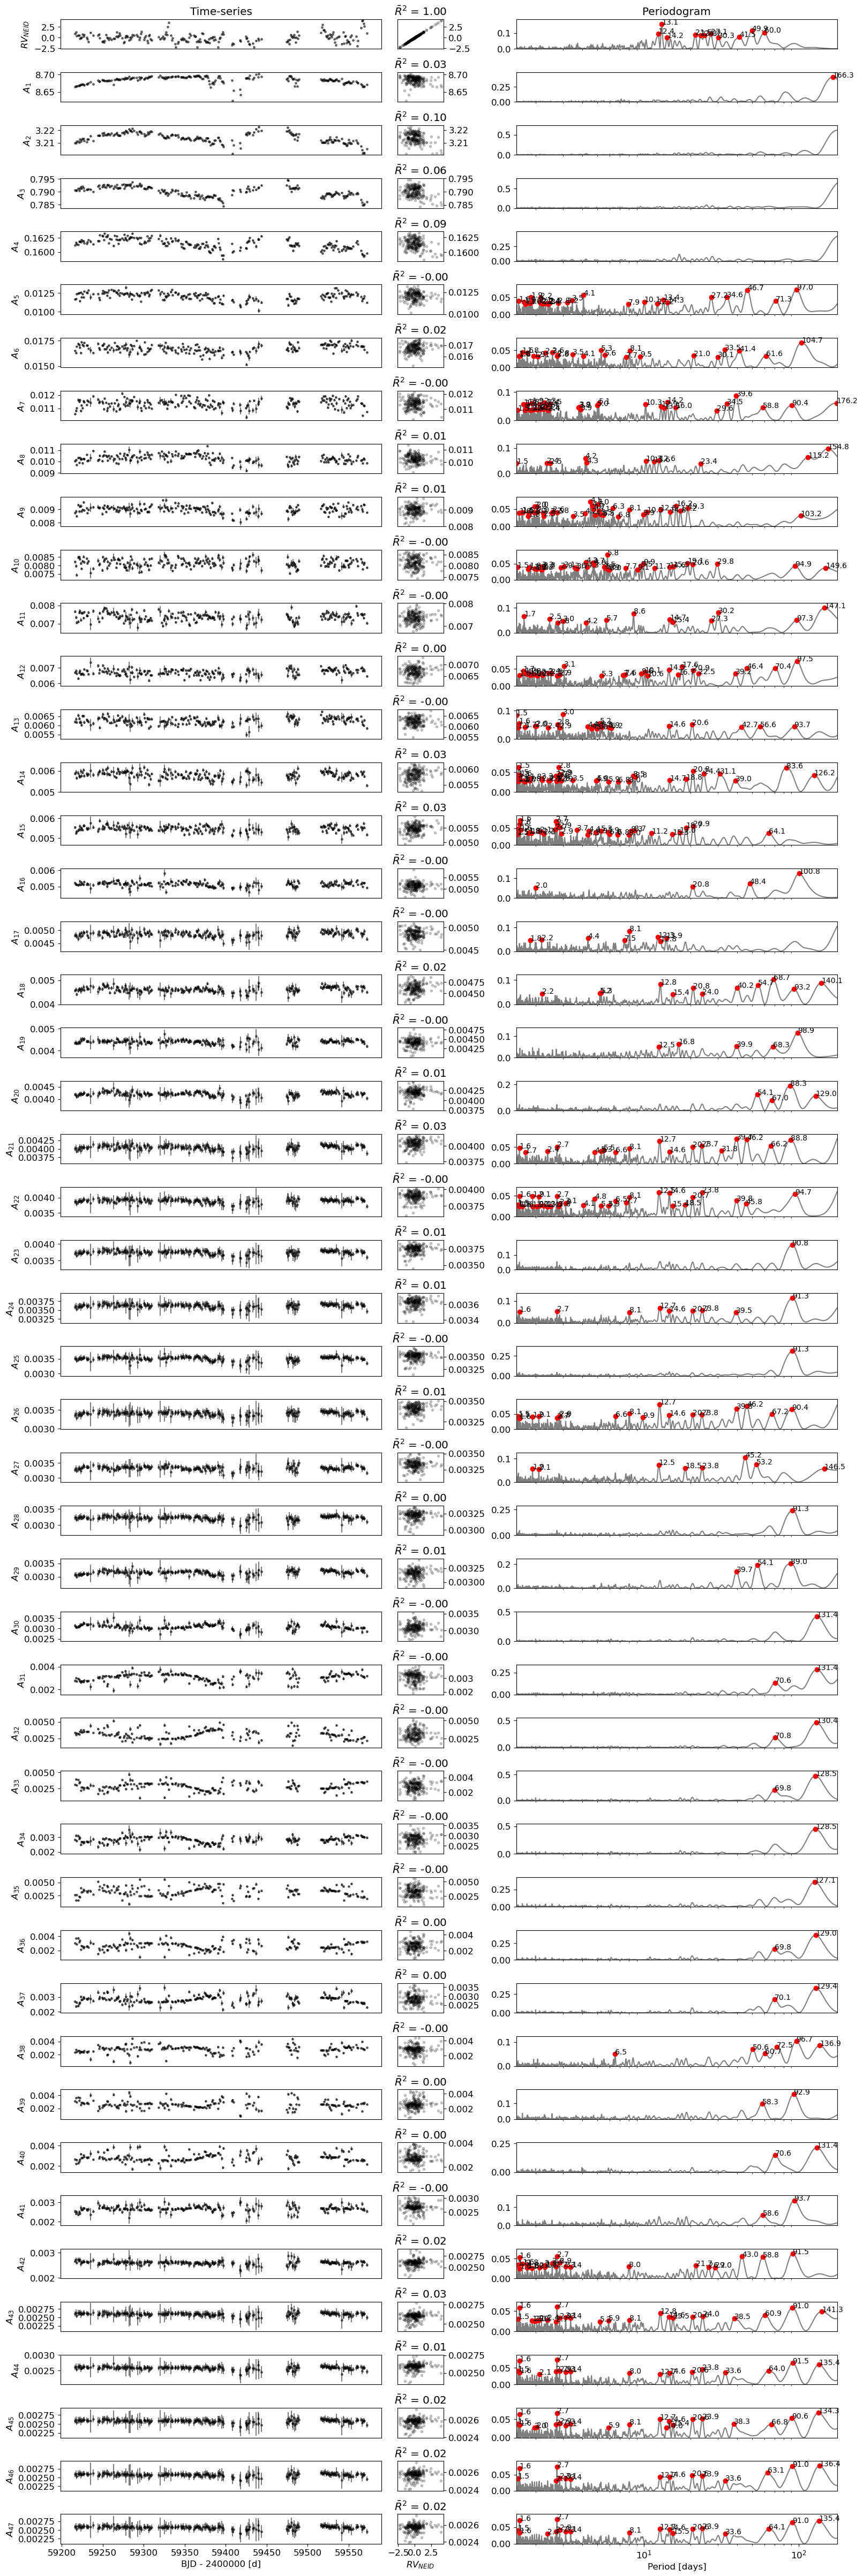

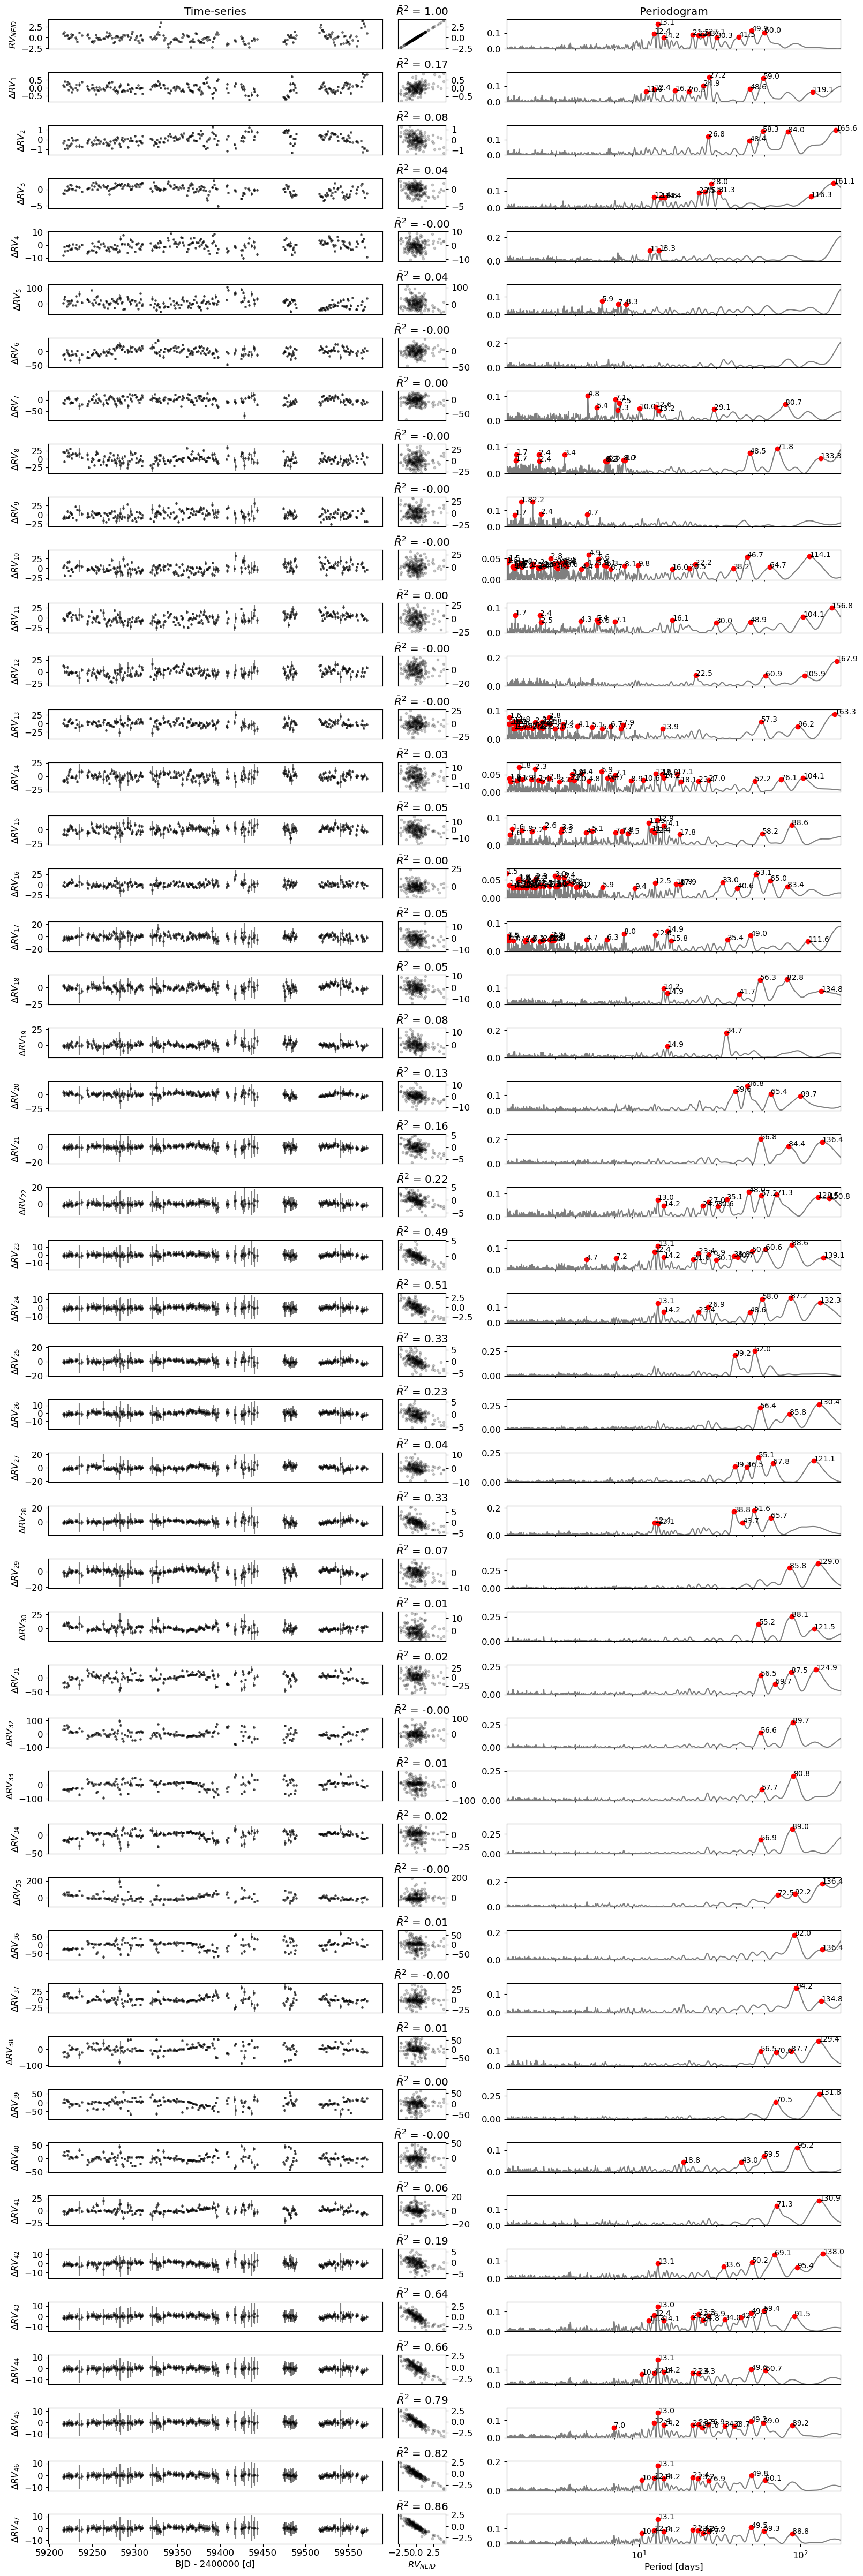

In [94]:
plot_all(k_mode=47, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=power_spectrum_daily, eind=err_power_spectrum_daily, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$A$',
    file_name=[])
plt.show()

plot_all(k_mode=47, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=shift_function_daily, eind=err_shift_spectrum_daily, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name=[])
plt.show()

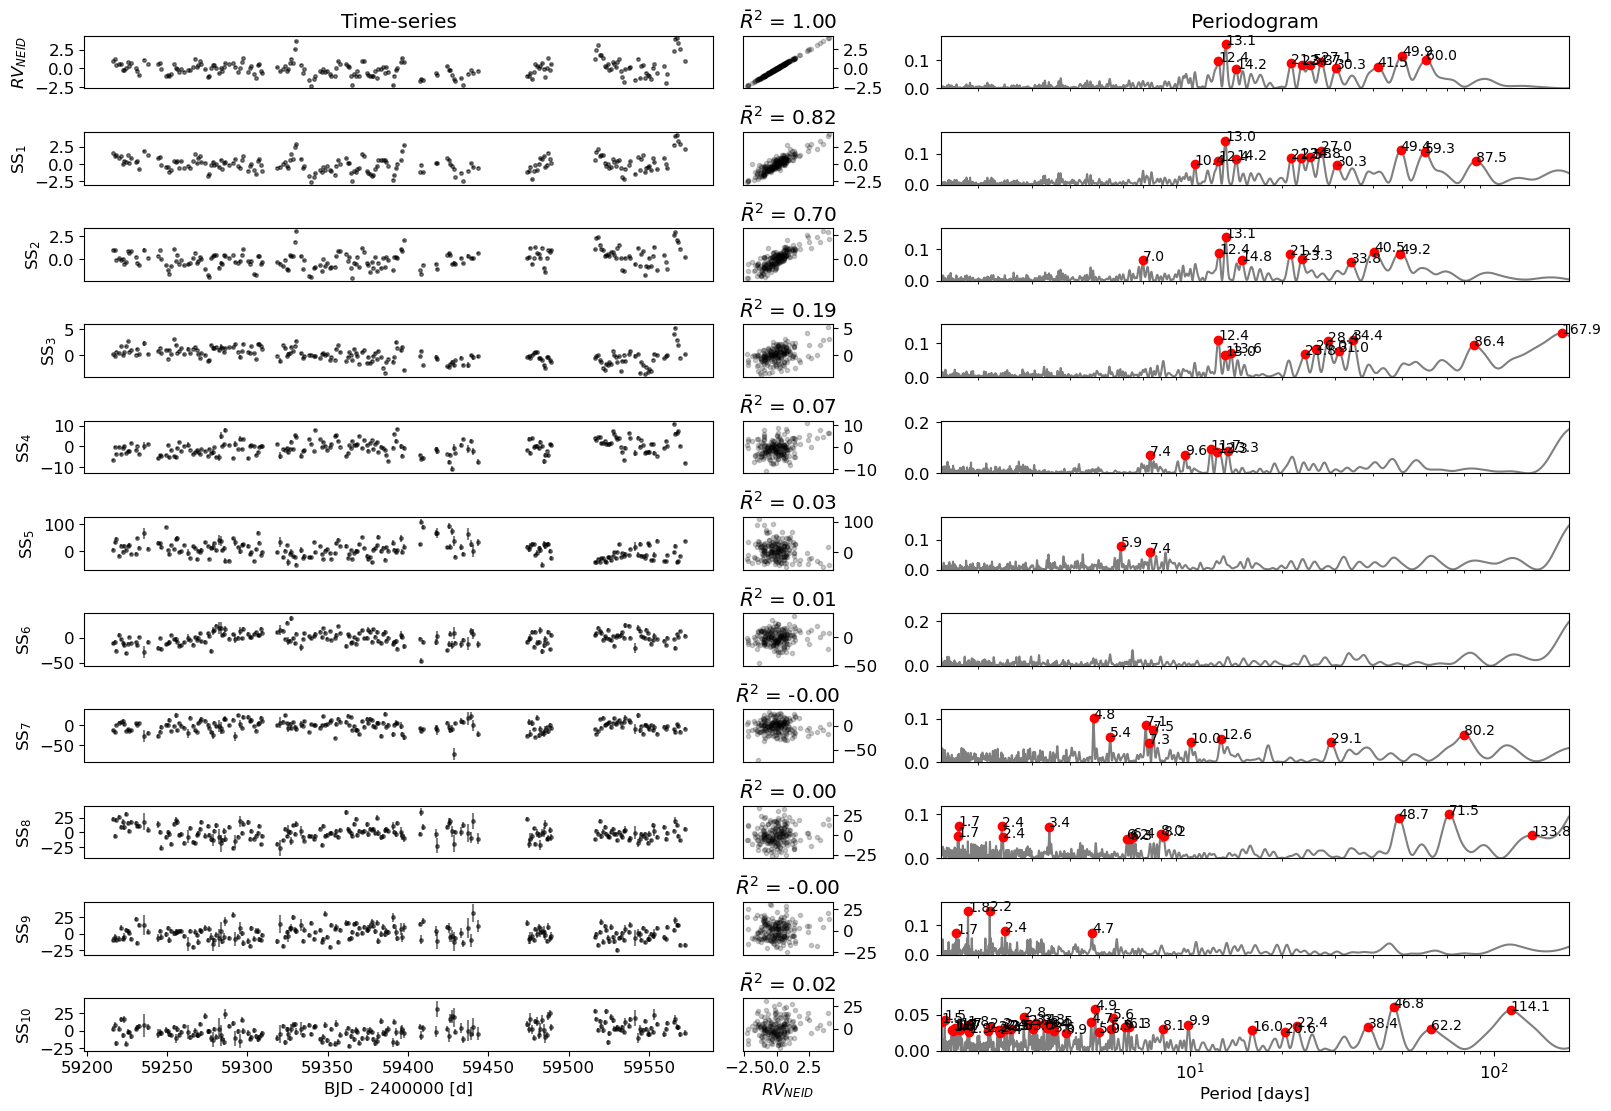

In [73]:
plot_all(k_mode=10, t=bjd_daily-2400000, rv=rv_daily, erv=σrv_daily, 
    ind=shift_spectrum_daily, eind=err_shift_spectrum_daily, 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel='SS',
    file_name=[])
plt.show()


### Multiple-linear regression

In [74]:
shift_function_daily.shape

(47, 202)

In [83]:
feature_matrix = shift_function_daily[0:6,:].T
y_hat1, w_std_all, w_rms1, score1, df1 = mlr(feature_matrix, target_vector=rv_daily, etarget_vector=σrv_daily, lag='False')

Weighted rms is reduced from 1.10 to 0.99 (-10%); 
		Modelled RV weigthed rms = 0.39;
		Adjusted R squared = 0.167.
   coefficients    std  variance  variance percentage
0          0.00   0.27      0.00                  0.0
1         -0.56   0.46      0.07                 42.8
2         -0.19   1.36      0.07                 43.5
3          0.01   3.38      0.00                  0.9
4         -0.00  26.20      0.02                 10.9
5          0.00  11.40      0.00                  1.9


#### Does MLR really work? - Data Scrambling

In [84]:
# np.random.shuffle(arr)
idx_arr = np.arange(len(rv_daily))
np.random.shuffle(idx_arr)
idx_arr
feature_matrix = shift_function_daily[0:6,idx_arr].T
y_hat1, w_std_all, w_rms1, score1, df1 = mlr(feature_matrix, target_vector=rv_daily, etarget_vector=σrv_daily, lag='False')

Weighted rms is reduced from 1.10 to 1.07 (-3%); 
		Modelled RV weigthed rms = 0.25;
		Adjusted R squared = 0.027.
   coefficients    std  variance  variance percentage
0          0.00   0.28      0.00                  0.0
1         -0.00   0.50      0.00                  0.0
2         -0.00   1.41      0.00                  0.0
3          0.04   3.52      0.02                 47.5
4         -0.00  29.97      0.01                 29.5
5          0.01  12.57      0.01                 23.0


#### Try activity indicators

In [77]:
np.array(df_ind).shape

NameError: name 'df_ind' is not defined

In [88]:
if 0:
    plot_all(k_mode=6, t=np.array(df_daily['obs_date.mean_bjd'][idx_non0]), rv=np.array(df_daily['rv.drp.mean_rv'][idx_non0]), erv=σrv_daily, 
        ind=shift_function_daily, eind=err_shift_spectrum_daily, 
        ts_xlabel='BJD - 2400000 [d]', 
        rv_xlabel='$RV_{NEID}$', 
        pe_xlabel='Period [days]',
        ind_yalbel=r'$\Delta RV$',
        file_name=[])
    plt.show()

### amplitudes and $\Delta RV$

In [89]:
T1      = pyasl.jdcnv(datetime(2021, 1, 1))
T2      = pyasl.jdcnv(datetime(2021, 5, 31))
idx_bjd = (bjd_daily>T1) & (bjd_daily<T2+1)

plt.rcParams.update({'font.size': 14})


plot_all(k_mode=10, t=bjd_daily[idx_bjd]-2400000, rv=rv_daily[idx_bjd], erv=σrv_daily[idx_bjd], 
    ind=power_spectrum_daily[idx_bjd], eind=err_power_spectrum_daily[idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$A$',
    file_name=[])
plt.show()

plot_all(k_mode=10, t=bjd_daily[idx_bjd]-2400000, rv=rv_daily[idx_bjd], erv=σrv_daily[idx_bjd], 
    ind=shift_function_daily[idx_bjd], eind=err_shift_spectrum_daily[idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name=[])
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 47 but corresponding boolean dimension is 202

In [80]:
power_spectrum_daily.shape

(47, 202)

In [81]:
plt.rcParams.update({'font.size': 14})
plot_all(k_mode=6, t=bjd[idx_valid], rv=rv[idx_valid], erv=σrv[idx_valid], 
    ind=power_spectrum[:,idx_valid], eind=err_power_spectrum[:,idx_valid], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$A$',
    file_name='./figure/' + 'Amplitude_time-series_correlation_periodogram_NEID_2021.pdf')
plt.show()

plot_all(k_mode=6, t=bjd[idx_valid], rv=rv[idx_valid], erv=σrv[idx_valid],  
    ind=shift_function[:,idx_valid], eind=err_shift_spectrum[:,idx_valid], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [days]',
    ind_yalbel=r'$\Delta RV$',
    file_name='./figure/' + 'shift_time-series_correlation_periodogram_NEID_2021.pdf')
plt.show()

NameError: name 'idx_valid' is not defined

In [ ]:
x = bjd[idx_bjd]
y = rv[idx_bjd]
dy = σrv[idx_bjd]
height_ratio=0.4
plot_min_t=min(np.diff(bjd[idx_bjd]))
max_f= 1/max(np.diff(bjd[idx_bjd]))
spp=100
plot_min_t, max_f

In [ ]:
np.mean(np.diff(bjd[idx_bjd])*24*60)

In [ ]:
T1      = pyasl.jdcnv(datetime(2021, 6, 1))
T2      = pyasl.jdcnv(datetime(2021, 6, 1))
idx_bjd = (bjd>T1) & (bjd<T2+1)

plt.rcParams.update({'font.size': 14})
plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=rv[idx_bjd], erv=σrv[idx_bjd], 
    ind=power_spectrum[:,idx_bjd], eind=err_power_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$A$',
    file_name='./figure/' + 'Amplitude_time-series_correlation_periodogram_NEID_0601.pdf')

plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=rv[idx_bjd], erv=σrv[idx_bjd],  
    ind=shift_function[:,idx_bjd], eind=err_shift_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$\Delta RV$',
    file_name='./figure/' + 'shift_time-series_correlation_periodogram_NEID_0601.pdf')

In [82]:
T1      = pyasl.jdcnv(datetime(2021, 4, 1))
T2      = pyasl.jdcnv(datetime(2021, 4, 1))
idx_bjd = (bjd>T1) & (bjd<T2+1)

plt.rcParams.update({'font.size': 14})
plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=rv[idx_bjd], erv=σrv[idx_bjd], 
    ind=power_spectrum[:,idx_bjd], eind=err_power_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$A$',
    file_name='./figure/' + 'Amplitude_time-series_correlation_periodogram_NEID_0401.pdf')

plot_all(k_mode=6, t=bjd[idx_bjd]*24*60, rv=rv[idx_bjd], erv=σrv[idx_bjd],  
    ind=shift_function[:,idx_bjd], eind=err_shift_spectrum[:,idx_bjd], 
    ts_xlabel='BJD - 2400000 [d]', 
    rv_xlabel='$RV_{NEID}$', 
    pe_xlabel='Period [min]',
    ind_yalbel=r'$\Delta RV$',
    file_name='./figure/' + 'shift_time-series_correlation_periodogram_NEID_0401.pdf')

NameError: name 'power_spectrum' is not defined